## Assessment Title: Integrated CA 

## Lecturer Name: David McQuaid & Muhammad Iqbal

## Student Full Name & Student ID:  Deniz OZSOY UGUR - 2023195 

### Link to Dataset

https://data.gov.ie/dataset/dublin-ringsend-rainfall-data?package_type=dataset

### GitHub Repository: 

https://github.com/denizozsoyugur/2023195_Integrated_CA

# Introduction

In [1]:
#pip install dash dash-core-components dash-html-components dash-table plotly

In [2]:
#pip install dash-bootstrap-components

In [3]:
#pip install plotly

In [4]:
#pip install pandas

In [5]:
# Import NumPy, Pandas, Matplotlib, Seaborn libraries and Plotly Express

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import plotly.express as px
import calendar

from dateutil.parser import parse 
import matplotlib as mpl
plt.rcParams.update({'figure.figsize': (10, 7), 'figure.dpi': 120})

In [6]:
# Import warnings and apply filterwarnings to ignore them.

import warnings
warnings.filterwarnings('ignore')

In [7]:
df = pd.read_csv("irish_monthly_rainy_weather.csv")

# pd.read_csv function in order to read the csv file

In [8]:
df.head(5)

#  Print the first 5 rows of the dataframe by applying the.head() function

,year,month,ind,rain,gdf,rd,wd
0,1941,1,0,112.8,13,18,18
1,1941,2,0,69.5,13,22,15
2,1941,3,0,111,50,21,13
3,1941,4,0,68.6,16.5,15,12
4,1941,5,0,66.4,20.1,13,10


In [9]:
missing_values = ['/',' ','-','--','na','Na','n/a','NA','n.a.','?','nan','Nan','nul','Nul','null','Null']

df= pd.read_csv('irish_monthly_rainy_weather.csv',na_values=missing_values)

# Create a list with all the possible missing value formats. Create a name for the dataframe as report
# ('irish_monthly_rainy_weather')and apply the pd.read_csv function 
# Include the variable 'na_values' and define it with the 'missing values' list previously created

In [10]:
df.isnull().sum()

# Check missing values by applying the .isnull().sum method to the dataframe

year       0
month      0
ind        0
rain      50
gdf      104
rd        91
wd        91
dtype: int64

In [11]:
df.isnull().sum() / len(df) * 100

# Check missing values by applying the .isnull().sum method to the dataframe and divide it by the length of the dataframe,
# calculated with the len() function. Then, multiply the result * 100 to obtain a percentage

year      0.000000
month     0.000000
ind       0.000000
rain      5.192108
gdf      10.799585
rd        9.449637
wd        9.449637
dtype: float64

In [12]:
df.columns

# Check the column names of the dataframe by applying the .columns attribute

Index(['year', 'month', 'ind', 'rain', 'gdf', 'rd', 'wd'], dtype='object')

In [13]:
df.rename(columns={'year':'Year', 
                   'month':'Month', 'ind':'Indicator','rain':'Precipitation_Amount','gdf':'Greatest_Daily_Fall',
                   'rd':'Number_of_Rainy_Days', 'wd':'Number_of_Wet_Days'}, inplace=True)

# Rename the columns of the dataframe by applying the .rename() method

In [14]:
df.drop(columns=["Indicator"], inplace=True)

# Apply .drop() to remove the column as it contains the same index values

In [15]:
df.head(2)

,Year,Month,Precipitation_Amount,Greatest_Daily_Fall,Number_of_Rainy_Days,Number_of_Wet_Days
0,1941,1,112.8,13.0,18.0,18.0
1,1941,2,69.5,13.0,22.0,15.0


In [16]:
# I am creating a list of the columns to convert. These columns currently contain an object data type
# and missing values. To convert them, missing values will be replaced with '0'. Afterwards,
# the values will be converted from object to numeric to utilise all the features that apply to numeric data types

cols_to_convert = ['Year','Month','Precipitation_Amount',
                   'Greatest_Daily_Fall',
                   'Number_of_Rainy_Days','Number_of_Wet_Days']

In [17]:
# Fill the missing values with 0 for the specified columns by applying the .fillna() method

df[cols_to_convert] = df[cols_to_convert].fillna(0)

In [18]:
# Calculating the percentage of missing values in each column obtained by applying the isnull().sum() method to the
#social_housing dataframe and dividing the result by the total number of rows within the dataframe, whose number is obtained by
# applying the .len() function.

df.isnull().sum()/len(df)*100

Year                    0.0
Month                   0.0
Precipitation_Amount    0.0
Greatest_Daily_Fall     0.0
Number_of_Rainy_Days    0.0
Number_of_Wet_Days      0.0
dtype: float64

In [19]:
# Converting the specified columns from object to integer data type by applying the .astype() method

df[cols_to_convert] = df[cols_to_convert].astype(int)

In [20]:
# Displaying the summary information of the dataframe by applying the .info() method

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 963 entries, 0 to 962
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   Year                  963 non-null    int32
 1   Month                 963 non-null    int32
 2   Precipitation_Amount  963 non-null    int32
 3   Greatest_Daily_Fall   963 non-null    int32
 4   Number_of_Rainy_Days  963 non-null    int32
 5   Number_of_Wet_Days    963 non-null    int32
dtypes: int32(6)
memory usage: 22.7 KB


In [21]:
df.shape

(963, 6)

In [22]:
df.head(5)

,Year,Month,Precipitation_Amount,Greatest_Daily_Fall,Number_of_Rainy_Days,Number_of_Wet_Days
0,1941,1,112,13,18,18
1,1941,2,69,13,22,15
2,1941,3,111,50,21,13
3,1941,4,68,16,15,12
4,1941,5,66,20,13,10


In [23]:
df['date'] = pd.to_datetime(df['Year'].astype(str) + '-' + df['Month']. astype(str), format='%Y-%m')

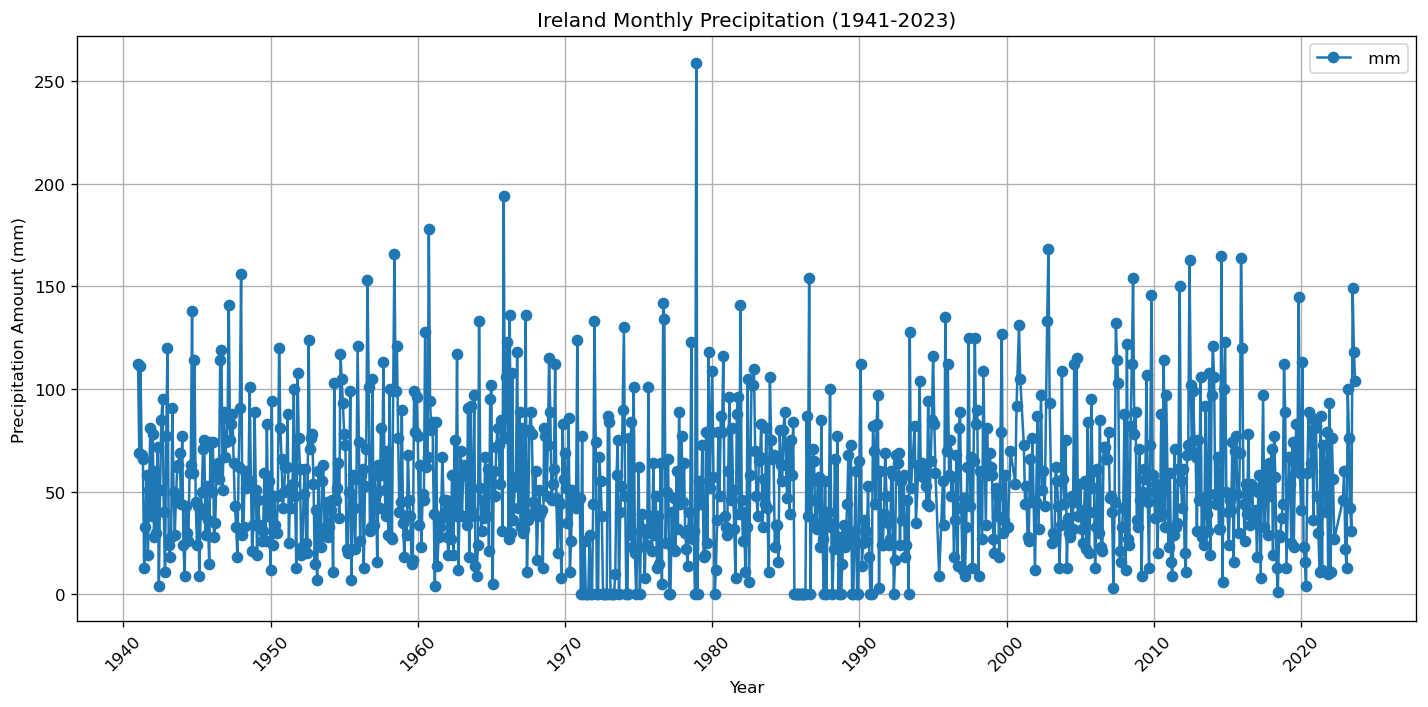

In [24]:
plt.figure(figsize=(12,6))
plt.plot(df['date'], df['Precipitation_Amount'], label=' mm', marker='o', linestyle='-')
plt.xlabel('Year')
plt.ylabel('Precipitation Amount (mm)')
plt.title('Ireland Monthly Precipitation (1941-2023)')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

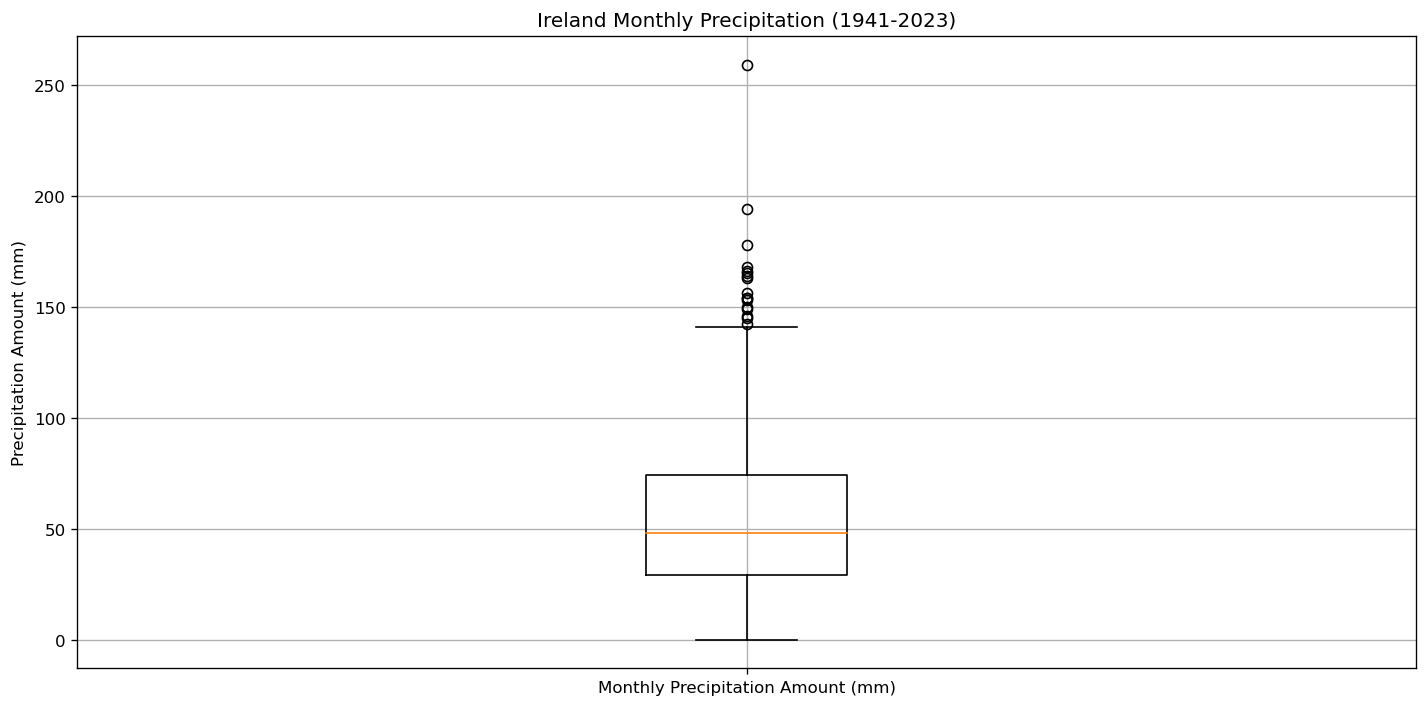

In [25]:
plt.figure(figsize=(12,6))
plt.boxplot(df['Precipitation_Amount'], labels=['Monthly Precipitation Amount (mm)'])

plt.ylabel('Precipitation Amount (mm)')
plt.title('Ireland Monthly Precipitation (1941-2023)')

plt.grid(True)
plt.tight_layout()
plt.show()

In [26]:
#Checking the description of data in our dataframe
df.describe()

,Year,Month,Precipitation_Amount,Greatest_Daily_Fall,Number_of_Rainy_Days,Number_of_Wet_Days
count,963.000000,963.000000,963.000000,963.000000,963.000000,963.000000
mean,1981.166147,6.484943,53.791277,13.298027,13.149533,9.471443
std,23.848870,3.462380,34.935061,10.423639,6.335268,5.036041
min,1941.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,1961.000000,3.000000,29.000000,7.000000,10.000000,6.000000
50%,1981.000000,6.000000,48.000000,11.000000,14.000000,10.000000
75%,2002.000000,9.500000,74.000000,18.000000,17.500000,13.000000
max,2023.000000,12.000000,259.000000,80.000000,29.000000,24.000000


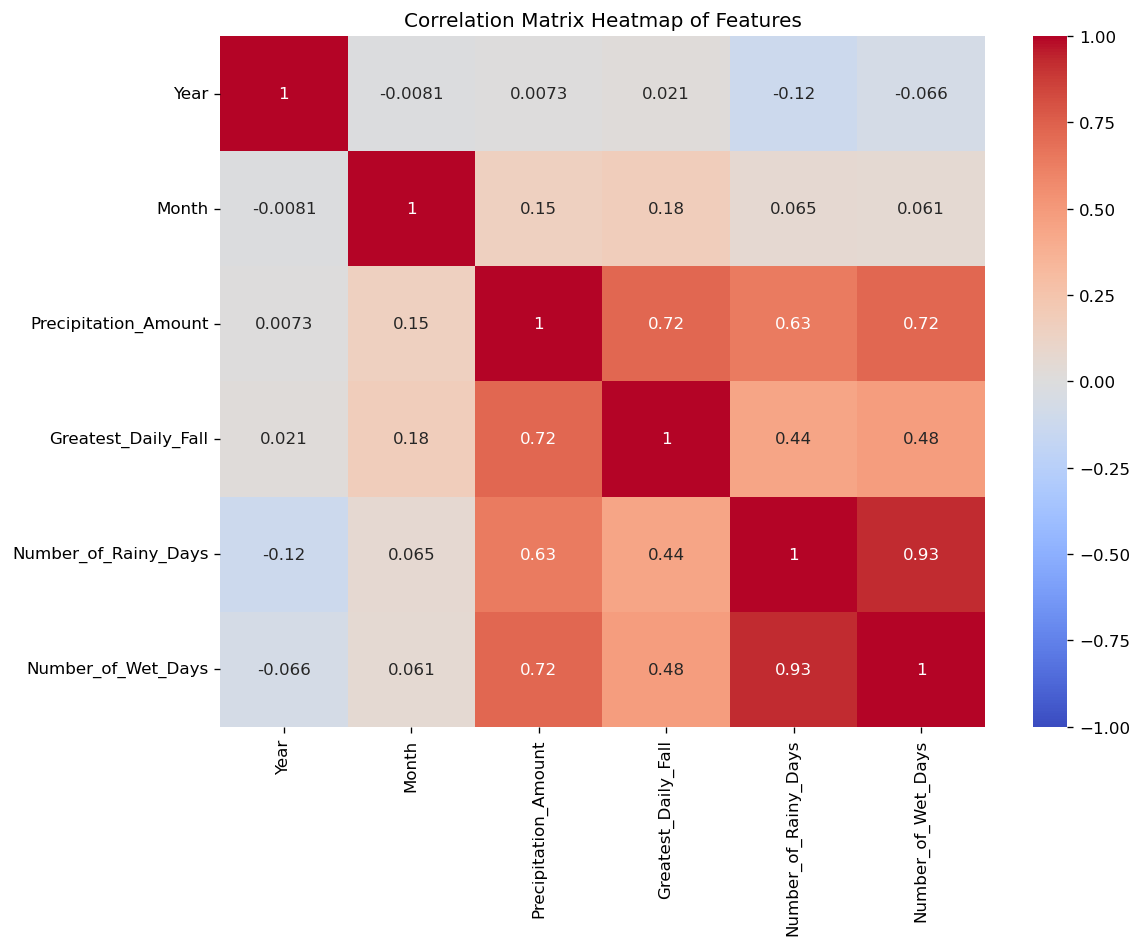

In [27]:
correlation_matrix = df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix Heatmap of Features')
plt.tight_layout()
plt.show()

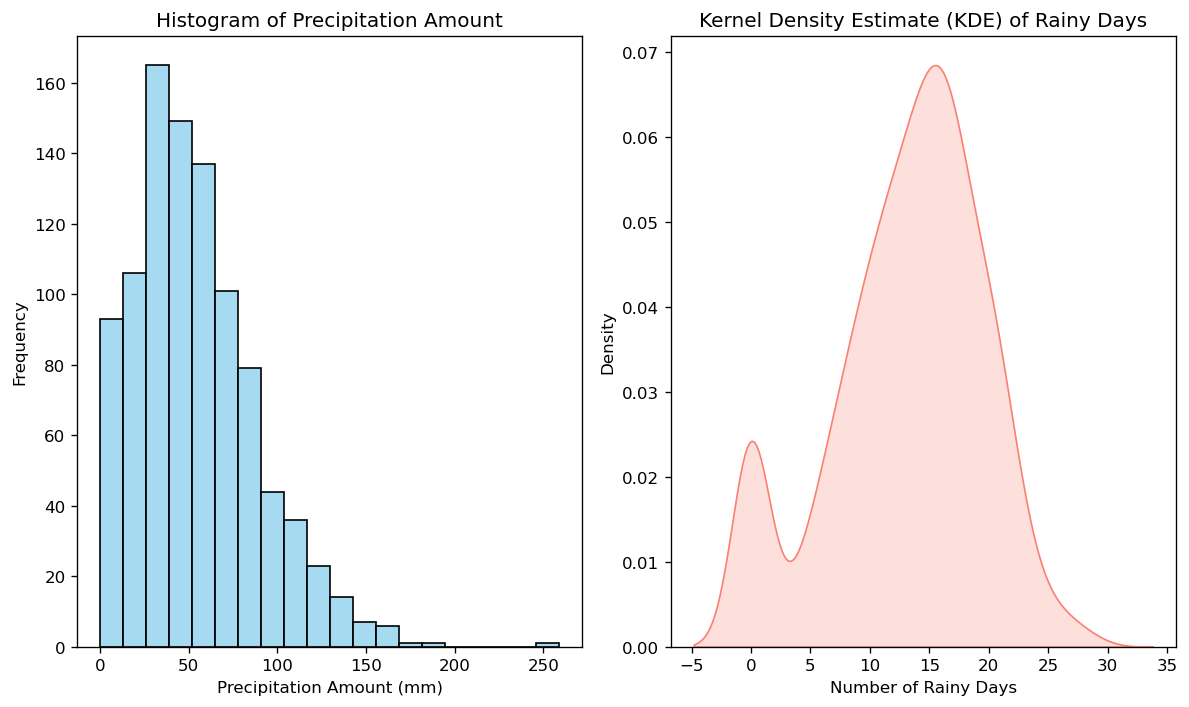

In [28]:
plt.figure(figsize=(10, 6))

plt.subplot(1, 2, 1)
sns.histplot(df['Precipitation_Amount'], bins=20, kde=False, color='skyblue')
plt.xlabel('Precipitation Amount (mm)')
plt.ylabel('Frequency')
plt.title('Histogram of Precipitation Amount')

plt.subplot(1, 2, 2)
sns.kdeplot(df['Number_of_Rainy_Days'], shade=True, color='salmon')
plt.xlabel('Number of Rainy Days')
plt.ylabel('Density')
plt.title('Kernel Density Estimate (KDE) of Rainy Days')

plt.tight_layout()
plt.show()

In [29]:
df['Year_Month'] = df['Year'].astype(str) + '-' + df['Month'].astype(str)

max_rain_per_year = df.groupby('Year')['Precipitation_Amount'].idxmax()

max_rain_months = df.loc[max_rain_per_year, ['Year', 'Month', 'Precipitation_Amount']]

max_rain_months.reset_index(drop=True, inplace=True)


In [30]:
max_rain_months.to_csv('max_rain_months.csv', index=False)

In [31]:
max_rain_months.head(5)

,Year,Month,Precipitation_Amount
0,1941,1,112
1,1942,9,95
2,1943,1,120
3,1944,9,138
4,1945,7,75


In [32]:
max_rain_months.shape

(83, 3)

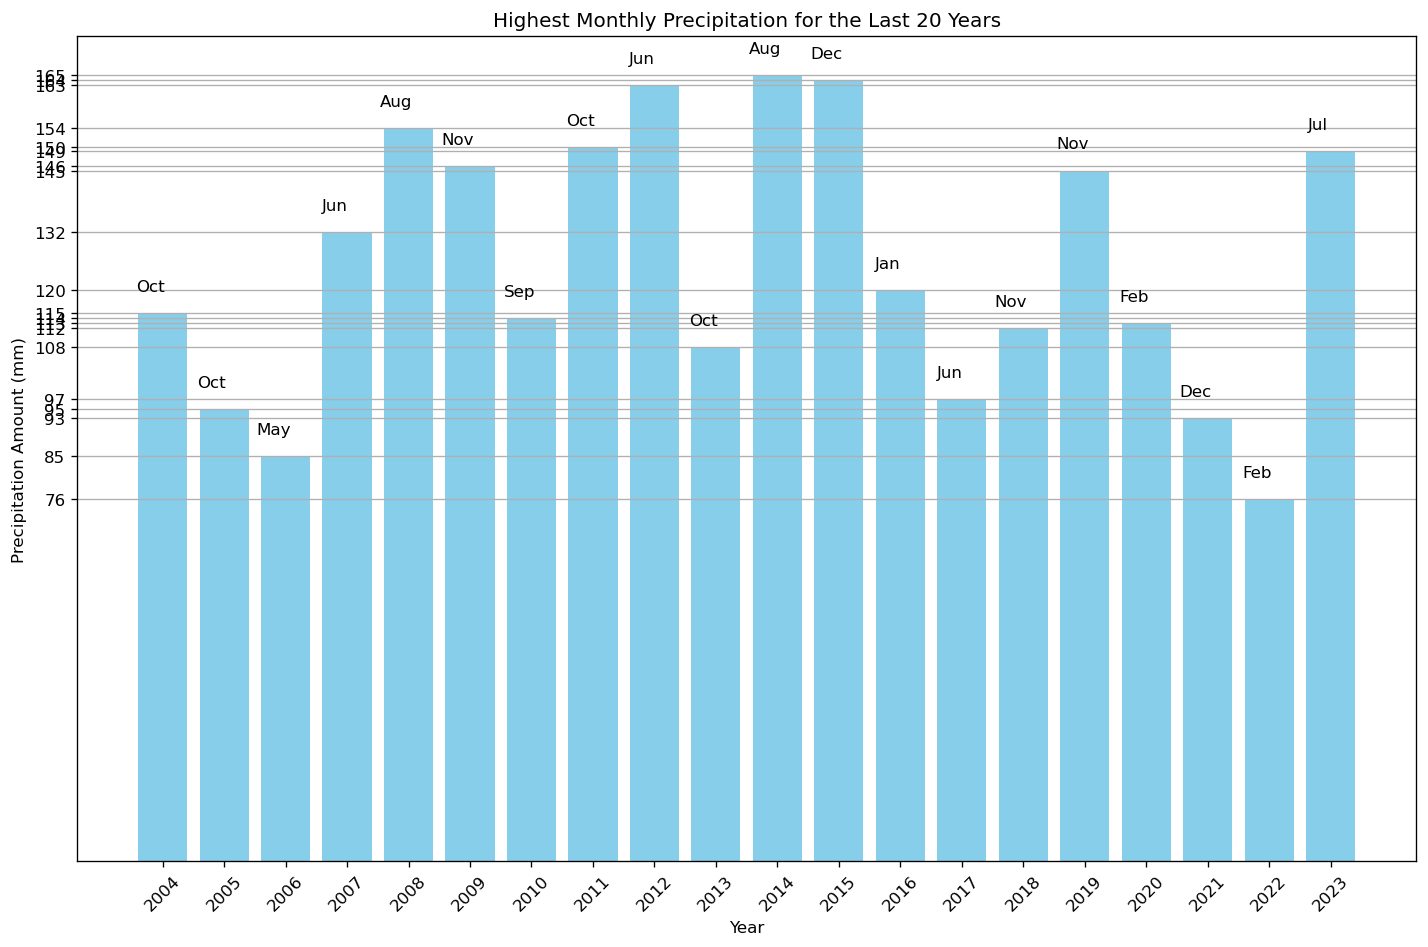

In [33]:
dfm = pd.read_csv('max_rain_months.csv')
dfm_last_20_years = dfm[dfm['Year'] >= 2004]

month_names = ['January', 'February', 'March', 'April', 'May', 'June', 'July',
               'August', 'September', 'October', 'November', 'December']

dfm_last_20_years['Month'] = dfm_last_20_years['Month'].apply(lambda x: month_names[int(x) - 1])

max_rain_months = dfm_last_20_years.groupby('Year')['Month'].first().reset_index()

plt.figure(figsize=(12,8))

bars = plt.bar(dfm_last_20_years['Year'].astype(str), dfm_last_20_years['Precipitation_Amount'], color='skyblue')

for i, bar in enumerate(bars):
    if max_rain_months['Month'].iloc[i] in month_names:
        month_idx = month_names.index(max_rain_months['Month'].iloc[i])
        month_abbr = calendar.month_abbr[month_idx + 1]
        plt.text(bar.get_x() + bar.get_width()/2 - 0.2, bar.get_height() + 4,
                 month_abbr, ha='center', va='bottom', color='black', fontsize=10)

plt.xlabel('Year')
plt.ylabel('Precipitation Amount (mm)')
plt.title('Highest Monthly Precipitation for the Last 20 Years')
plt.xticks(rotation=45)
plt.yticks(dfm_last_20_years['Precipitation_Amount'])
plt.grid(axis='y')
plt.tight_layout()
plt.show()

In [34]:
df.head()

,Year,Month,Precipitation_Amount,Greatest_Daily_Fall,Number_of_Rainy_Days,Number_of_Wet_Days,date,Year_Month
0,1941,1,112,13,18,18,1941-01-01,1941-1
1,1941,2,69,13,22,15,1941-02-01,1941-2
2,1941,3,111,50,21,13,1941-03-01,1941-3
3,1941,4,68,16,15,12,1941-04-01,1941-4
4,1941,5,66,20,13,10,1941-05-01,1941-5


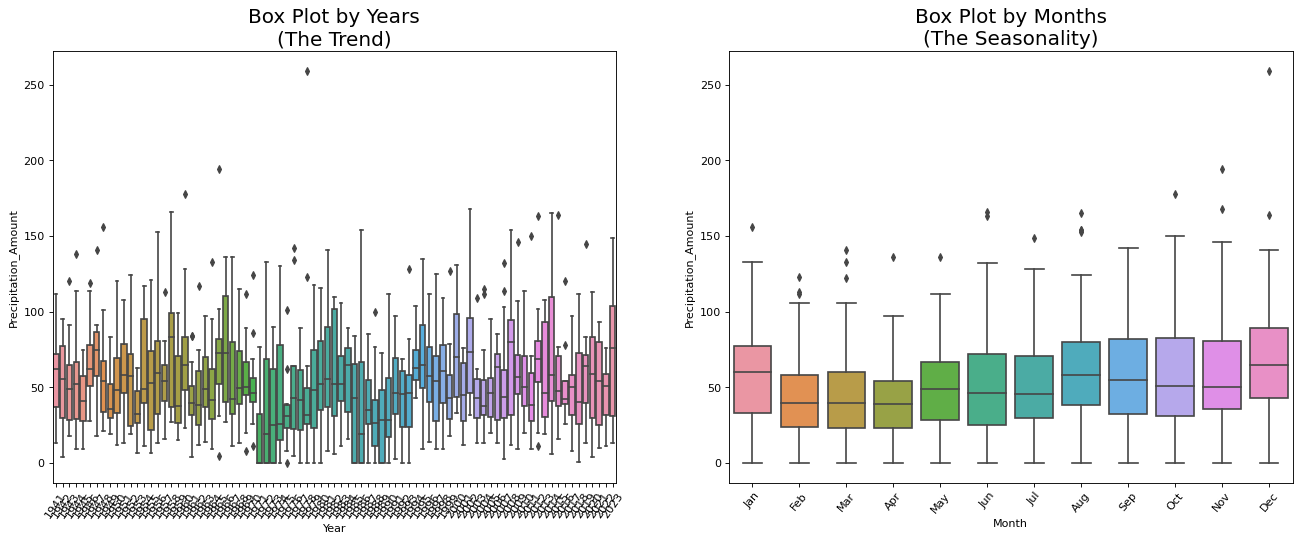

In [56]:
df.reset_index(drop=True, inplace=True)

df['Year'] = [d.year for d in df.date]
df['Month'] = [d.strftime('%b') for d in df.date]
years = df['Year'].unique()

fig, axes = plt.subplots(1, 2, figsize=(20,7), dpi= 80)
sns.boxplot(x='Year', y='Precipitation_Amount', data=df, ax=axes[0])
sns.boxplot(x='Month', y='Precipitation_Amount', data=df.loc[~df.Year.isin([1941, 203]), :], ax=axes[1])

axes[0].set_title('Box Plot by Years\n(The Trend)', fontsize=18); 
axes[1].set_title('Box Plot by Months\n(The Seasonality)', fontsize=18)

axes[0].tick_params(axis='x', labelrotation=55)
axes[1].tick_params(axis='x', labelrotation=50)

plt.show()

In [ ]:
annual_rainfall = df.groupby('Year')['Precipitation_Amount'].sum()

def plot_df(df, x, y, title="", xlabel='Year', ylabel='Daily Rainfall Amount', dpi=100):
    plt.figure(figsize=(12,6), dpi=dpi)
    plt.plot(x, y, color='tab:red')
    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
    plt.xticks(rotation=50)
    plt.grid(True)
    plt.show()

plot_df(df, x=annual_rainfall.index, y=annual_rainfall.values, title='Annual Rainfall Amount in Ireland from 1941 to 2023')

In [ ]:
x = df['Year'].values
y1 = df['Precipitation_Amount'].values

# Pozitif ve negatif değerler için dolgu aralıkları oluşturalım
plt.figure(figsize=(16,5), dpi=100)
plt.fill_between(x, y1=y1, where=(y1 >= 0), interpolate=True, color='lightgreen', alpha=0.7, label='Above 0')

# Sıfır çizgisini ekleyelim
plt.hlines(y=0, xmin=np.min(x), xmax=np.max(x), linewidth=.5, color='black')

# Diğer grafik özelliklerini ekleyelim
plt.title('Daily Rainfall Amount', fontsize=16)
plt.xlabel('Year')
plt.ylabel('Precipitation Amount')
plt.grid(True)
plt.legend()

plt.show()